# First let's import, then look for the assignment below

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_cl

# Assignment-2 Problem-2,3,4: Construct as requested

## 2 graded by SV; 3 by AR; 4 by LT

### BEFORE YOU SUBMIT THIS FILE, PLEASE RENAME THIS FILE BY REPLACING THE 0000000 IN THE FILE NAME WITH YOUR CORRECT UNID. KEEP THE "u" AT THE BEGINNING.

# Problem-2 graded by SV

<font size="4">    
1. Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that accepts an even number of *non-overlapping occurrences* of  $010$s. Thoroughly document your construction!
    
HERE ARE EXAMPLES :

* 01010 - does NOT have an even number of 0's because we wanted NON-OVERLAPPING

* 0101010 - has two NON-OVERLAPPING occurrences of 010 -- that is what we want!

* 0101111010 - has two NON-OVERLAPPING occurrences of 010

* 111111 - has ZERO occurrences of 010
    
</font>

### Approach: We will name states to remember the essence of the history of inputs so far. If you do so, and also keep the sense of where the machine is (in an I state, an IF state or an F state), then you'll have the solution fall out automatically!

In [2]:
Even010 = md2mc('''
DFA 

!! Begin with an IF state, since we have seen an even number of 010's (i.e. none).
!! We call this the "initial claim"

!! Also when deciding whether to decode on a 0 or a 1, in general pick the one where 
!! nothing much happens, first. Then you move onto the more salient case. Try to
!! follow this "rule of the thumb as often as needed."

!! Also try to bunch-up the decodings out of one state as I do (two at a time below)
!! leaving one blank line. Try to also align comments in columns!

IF : 1 -> IF   !! The initial claim is still true, and no progress toward another 010 yet
IF : 0 -> F0   !! Accepts 0, and records it in the state name. Still an "F" state.

F0 : 0 -> F0  !! No progress toward another 010, but initial claim is still true.
F0 : 1 -> F01 !! Progress toward a 010, so remember

F01 : 1 -> IF  !! Initial claim true, and no progress toward another 010. 
F01 : 0 -> S   !! Accepted one 010, so "odd 010s" seen. Forget all that's seen so far.

S : 1 -> S   !! No progress toward another 010. Initial claim is false
S : 0 -> S0  !! Progress toward another 010

S0  : 0 -> S0  !! Stay hopeful that a 010 is coming
S0  : 1 -> S01 !! Progress toward a second 010 is achieved

S01 : 1 -> S  !! No progress toward a 010; start all over again
S01 : 0 -> IF !! An even number of 010's seen. Revert to IF, forgetting all seen

''')

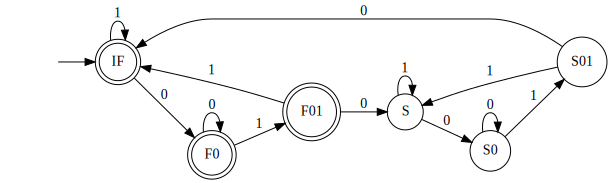

In [3]:
dotObj_dfa(Even010)

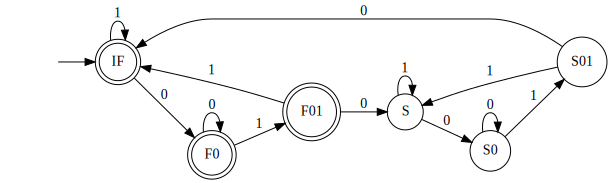

In [4]:
dotObj_dfa(Even010)

# Problem-3 graded by AR

<font size="4">    
3. Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that ends in a $010$, calling it Ends010. Then obtain the intersection with the Even010 machine using intersect_dfa. 
    
    Call the intersection Even010_Ends010.
    
    Next, minimize Even010_Ends010, storing it in min_Even010_Ends010 .
    
    Again, document the construction thoroughly.
    
</font>

### Approach: We will define a machine for "ends $010$" as illustrated in SV's part, and negate.

In [5]:
Ends010 =  md2mc('''
DFA

!! Initially we are in an "I" state. It is not an "IF" because we have to see something.
!!
I : 1 -> I  !! Seeing a '1' at the beginning is uninteresting. Punt.
I : 0 -> S0 !! Now saw a '0' and so we must wake up and pay attention.

!! The rest of the construction goes as described in detail above. We comment as needed.

S0 : 0 -> S0  !! Seeing another '0' does not help make progress toward '010'
S0 : 1 -> S01 !! This is getting closer to '010' so do pay attention

S01 : 1 -> I  !! Total disappointment as the pattern broke; we need to reset and begin
S01 : 0 -> F  !! Success thus far; forget what's seen, so state letter is "F"

F : 0 -> S0   !! Game starts again, but reuse S0
F : 1 -> S01  !! Start all over from S01 (can reuse)

 
''')

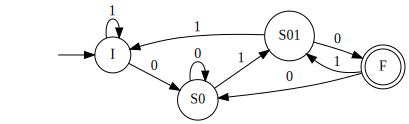

In [6]:
# Let's see the "Ends010" machine
dotObj_dfa(Ends010, FuseEdges=True)

## Obtain the intersection of Even010 and Ends010

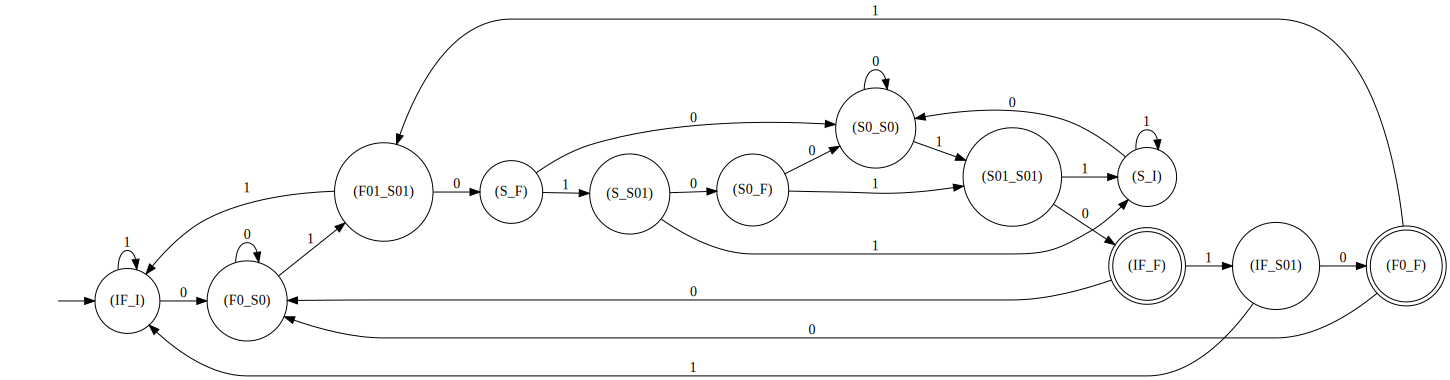

In [7]:
Even010_Ends010 = intersect_dfa(Even010, Ends010)
dotObj_dfa(Even010_Ends010)

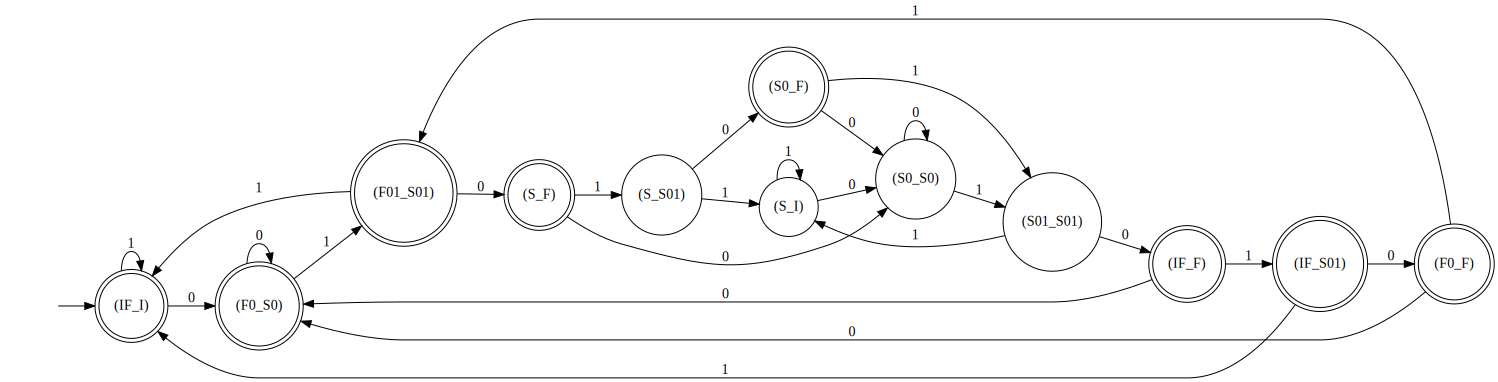

In [8]:
# try union and minimization !!
Even010_or_Ends010 = union_dfa(Even010, Ends010)
dotObj_dfa(Even010_or_Ends010)

In [ ]:
min_Even010_or_Ends010 = 

## Minimize the intersection of Even010 and Ends010

In [22]:
help(min_dfa)


Help on function min_dfa in module jove.Def_DFA:

min_dfa(D, state_name_mode='succinct')
    In : D (consistent DFA to be minimized)
    Out: Minimized version of D.
    The top-level callable DFA minimizer.
    Given a DFA D, go through the state minimization algorithm.
    state_name_mode is 'verbose' or 'succinct', producing two 
    variants, as you can guess.
    If the state_name_mode is verbose, we will make state names
    by stringing together the state names in the equivalence
    classes. Else we keep the name of the representative of 
    eqch equivalence class.



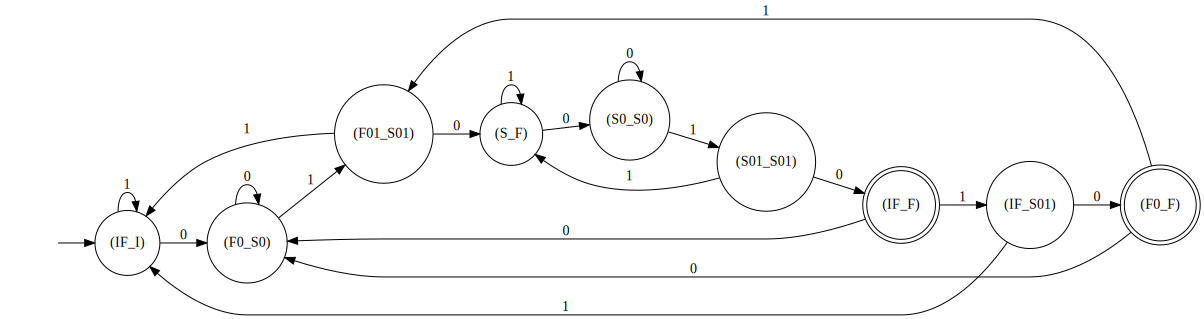

In [25]:
min_Even010_Ends010 = min_dfa(Even010_Ends010)
dotObj_dfa(min_Even010_Ends010)

# Problem-4 graded by LT

<font size="4"> 
... Your explanations here - a template of your answer is as follows ...
    
**This template tries to limit the number of cases you have to list**
 
 
 
 * I find that state SOMESTATE1 is present in DFA1 but SOMESTATE1 is absent in DFA2 
 
 
   - I can obtain this info by doing DFA1["Q"] - DFA2["Q"]
   - I can also eye-ball the diagrams and spot the missing state
   - But I recall that in the diagram, a state may show up P_Q while in the DFA1["Q"] - DFA2["Q"] printout, it may show up as ('P','Q')
 
 
 
 * IF THERE ARE MULTIPLE *SOMESTATE1* that are missing in DFA2, PLEASE PICK THE ONE THAT INVOLVES STATE 'I'  and call that the *SOMESTATE1* for the remaining questions BELOW
 
 
 * Based on these, I find that S_I is present in DFA1 but absent in DFA2
 
 
 * But I find that 010011 (pick the shortest string in numeric order) that reached S_I in DFA1 is now reaching state S_F  in DFA2
 
 * Thus I conclude that state S_I and S_F are equivalent
 
 * This is further confirmed by the fact that (**here I am limiting your checks to 3 cases**)
   
   
   - upon 0, S_I goes to  while S_F goes to  S0_S0  (both same state; both non-accepting)
   

   
   - upon 1, S_I goes to S_I and S_F goes to S_F (both non-accepting)
   
   
   
   - upon 01, S_I and S_F go to S01_S01 (both non-accepting)
   
  
* Hence the minimization looks OK!  
  
 
    
</font>

## Find out which states were eliminated

In [33]:
Even010_Ends010["Q"] - min_Even010_Ends010["Q"]

{('S', 'I'), ('S', 'S01'), ('S0', 'F')}

In [34]:
min_Even010_Ends010["Q" ] - Even010_Ends010["Q"]

set()

In [29]:
Even010_Ends010["Q"]

{('F0', 'F'),
 ('F0', 'S0'),
 ('F01', 'S01'),
 ('IF', 'F'),
 ('IF', 'I'),
 ('IF', 'S01'),
 ('S', 'F'),
 ('S', 'I'),
 ('S', 'S01'),
 ('S0', 'F'),
 ('S0', 'S0'),
 ('S01', 'S01')}

In [31]:
min_Even010_Ends010["Q"]

{('F0', 'F'),
 ('F0', 'S0'),
 ('F01', 'S01'),
 ('IF', 'F'),
 ('IF', 'I'),
 ('IF', 'S01'),
 ('S', 'F'),
 ('S0', 'S0'),
 ('S01', 'S01')}

In [32]:
langeq_dfa(Even010_Ends010, min_Even010_Ends010)

True

# Testing the machine

In [12]:
help(nthnumeric)

Help on function nthnumeric in module jove.LangDef:

nthnumeric(N, S=['a', 'b'])
    Assume S ('Sigma') is a 2-sized list of chars (default ['a','b']). 
    Produce the Nth string in numeric order, where N >= 0.
    Idea : Given N, get b = floor(log_2(N+1)) - need that 
    many places; what to fill in the places is the binary 
    code for N - (2^b - 1) with 0 as S[0] and 1 as S[1].



## Test the constructed machine the "direct" way

In [12]:
TestList = [ nthnumeric(i, ['0','1']) for i in range(256) ]

In [13]:
TestList

['',
 '0',
 '1',
 '00',
 '01',
 '10',
 '11',
 '000',
 '001',
 '010',
 '011',
 '100',
 '101',
 '110',
 '111',
 '0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111',
 '00000',
 '00001',
 '00010',
 '00011',
 '00100',
 '00101',
 '00110',
 '00111',
 '01000',
 '01001',
 '01010',
 '01011',
 '01100',
 '01101',
 '01110',
 '01111',
 '10000',
 '10001',
 '10010',
 '10011',
 '10100',
 '10101',
 '10110',
 '10111',
 '11000',
 '11001',
 '11010',
 '11011',
 '11100',
 '11101',
 '11110',
 '11111',
 '000000',
 '000001',
 '000010',
 '000011',
 '000100',
 '000101',
 '000110',
 '000111',
 '001000',
 '001001',
 '001010',
 '001011',
 '001100',
 '001101',
 '001110',
 '001111',
 '010000',
 '010001',
 '010010',
 '010011',
 '010100',
 '010101',
 '010110',
 '010111',
 '011000',
 '011001',
 '011010',
 '011011',
 '011100',
 '011101',
 '011110',
 '011111',
 '100000',
 '100001',
 '100010',
 '100011',
 '100100',
 '100101',
 '100110'

In [14]:
help(accepts_dfa)

Help on function accepts_dfa in module jove.Def_DFA:

accepts_dfa(D, s)
    In : D (consistent DFA)
         s (string over D's sigma, including "")
    Out: Boolean (if state after s-run is in D's final).



In [15]:
for test in TestList:
    if accepts_dfa(min_Even010_Ends010, test):
        print(" min_Even010_Ends010 : accepts ", test)
    else:
        print(" min_Even010_Ends010 : does not accept ", test)

 min_Even010_Ends010 : does not accept  
 min_Even010_Ends010 : does not accept  0
 min_Even010_Ends010 : does not accept  1
 min_Even010_Ends010 : does not accept  00
 min_Even010_Ends010 : does not accept  01
 min_Even010_Ends010 : does not accept  10
 min_Even010_Ends010 : does not accept  11
 min_Even010_Ends010 : does not accept  000
 min_Even010_Ends010 : does not accept  001
 min_Even010_Ends010 : does not accept  010
 min_Even010_Ends010 : does not accept  011
 min_Even010_Ends010 : does not accept  100
 min_Even010_Ends010 : does not accept  101
 min_Even010_Ends010 : does not accept  110
 min_Even010_Ends010 : does not accept  111
 min_Even010_Ends010 : does not accept  0000
 min_Even010_Ends010 : does not accept  0001
 min_Even010_Ends010 : does not accept  0010
 min_Even010_Ends010 : does not accept  0011
 min_Even010_Ends010 : does not accept  0100
 min_Even010_Ends010 : does not accept  0101
 min_Even010_Ends010 : does not accept  0110
 min_Even010_Ends010 : does not acce

## Use Python's "filter" function to filter out the accepted strings directly

In [16]:
list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), TestList))

['010010', '0010010', '0100010', '0101010', '1010010']

## Doubled the testing range; now finding at least ten strings !!

In [17]:
TestList = [ nthnumeric(i, ['0','1']) for i in range(512) ]
list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), TestList))

['010010',
 '0010010',
 '0100010',
 '0101010',
 '1010010',
 '00010010',
 '00100010',
 '00101010',
 '01000010',
 '01010010',
 '01011010',
 '10010010',
 '10100010',
 '10101010',
 '11010010']

# END